In [1]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [7]:
#Preparation of data
mean_01 = np.array([0., 0.])
cov_01 = np.array([[1.0, 1.2], [1.2, 1.5]])

data = np.random.multivariate_normal(mean_01, cov_01, 800)
print data.shape

(800, 2)


In [8]:
#X is the dataset
def pca(X, k = None):
    
    if k is None:
        k = X.shape[1]
        
    A = np.cov(X.T)
    
    #Compute the eigenvectors and eigenvalues
    eig_val, eig_vec = np.linalg.eig(A)
    
    return eig_val, eig_vec


In [9]:
lam, W = pca(data)
print lam.shape, W.shape

(2,) (2, 2)


In [10]:
print lam
print W

[ 0.02402525  2.57449665]
[[-0.77293811 -0.63448143]
 [ 0.63448143 -0.77293811]]


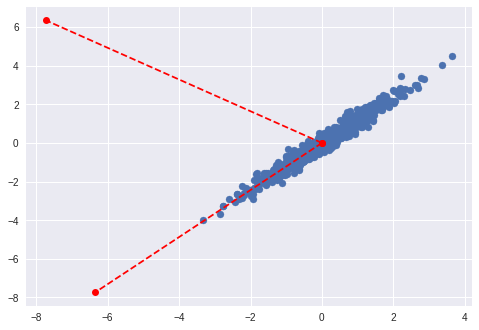

In [12]:
plt.figure(0)
sns.plt.scatter(data[:, 0], data[:, 1])
plt.plot([0, 10*W[0, 0]], [0, 10*W[1, 0]], 'ro--')
plt.plot([0, 10*W[0, 1]], [0, 10*W[1, 1]], 'ro--')
plt.show()

In [13]:
Z = data.dot(W)
print Z.shape
print Z[:10]

(800, 2)
[[ 0.07808632  0.54185411]
 [-0.2654835   1.95963492]
 [ 0.12908886 -0.47043781]
 [-0.10656798  0.45997003]
 [-0.0233891  -0.33724005]
 [ 0.23823785 -0.52254021]
 [ 0.21948608 -0.14748484]
 [ 0.06274168 -0.59510897]
 [-0.05113755 -1.71194731]
 [-0.11240865  1.57462151]]


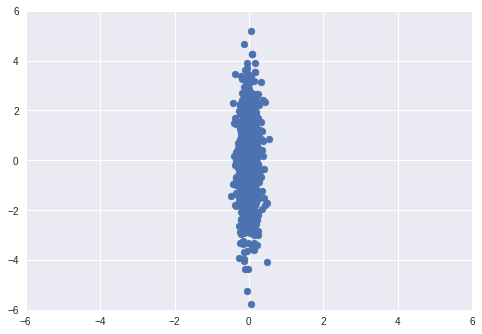

In [14]:
plt.figure(0)
plt.xlim(-6, 6)
plt.ylim(-6, 6)
sns.plt.scatter(Z[:, 0], Z[:, 1])
plt.show()


In [16]:
np.cov(Z.T)

array([[  2.40252531e-02,  -1.86195101e-16],
       [ -1.86195101e-16,   2.57449665e+00]])

In [17]:
print np.cumsum(lam[::-1]/lam.sum())

[ 0.99075426  1.        ]


In [ ]:
b